### Data Source

The dataset used in this analysis is the Palmer Archipelago (Antarctica) Penguin Data. It is publicly available on Kaggle and can be accessed via the following link:

[Palmer Archipelago (Antarctica) Penguin Data on Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/data)

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import pylab as pl
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import  classification_report,ConfusionMatrixDisplay,accuracy_score

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        334.000000       334.000000         334.000000   334.000000
mean          43.994311        17.160479         201.014970  4209.056886
std            5.460521         1.967909          14.022175   804.836129
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.575000        18.700000         213.000000  4793.750000
max           59.600000        21.500000         231.000000  6300.000000

Distribution of data 

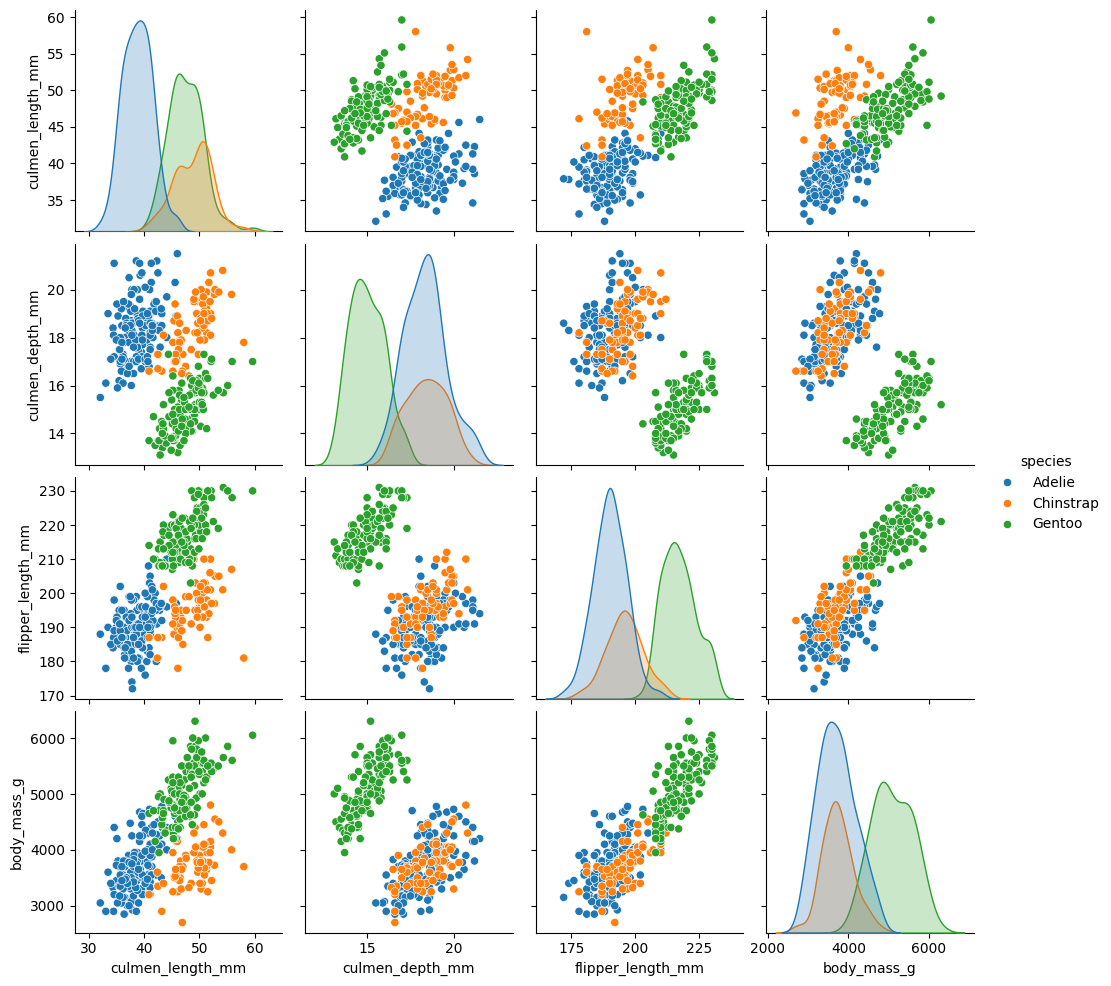

In [2]:
# Analyzing the dataset
df = pd.read_csv('penguins_size.csv')

print(df.isnull().sum())
df = df.dropna()
print(df.keys())
print(df.describe())
print()

sns.pairplot(df,hue='species')
print("Distribution of data on the graph")
plt.show()

In [3]:
#Data Encoding
from sklearn.preprocessing import LabelEncoder

encode_island = LabelEncoder()
df['island'] = encode_island.fit_transform(df['island'])

encode_sex = LabelEncoder()
df['sex'] = encode_sex.fit_transform(df['sex'])

species_map = {
    'Adelie':0,
    'Chinstrap':1,
    'Gentoo':2
    }
df['species'] = df['species'].map(species_map)

Correlation Heatmap


<Axes: >

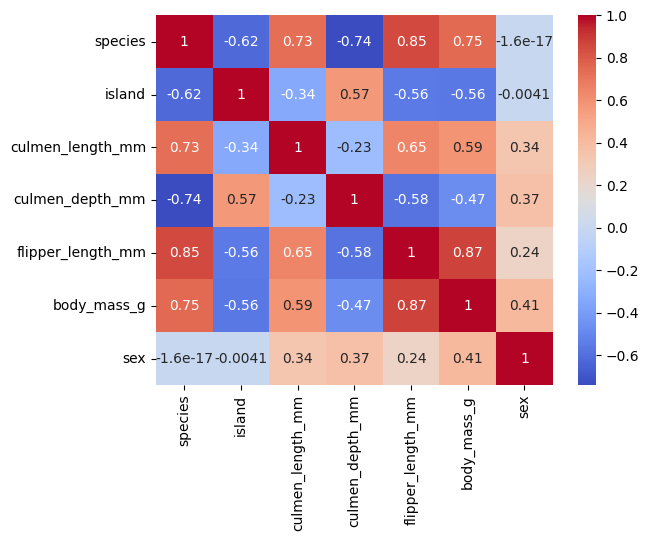

In [4]:
#I look at the heatmap to select the data to use in the model
print("Correlation Heatmap")
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [5]:
# Preparing the dataset
X = df.drop(columns=['species','island','sex','culmen_depth_mm'],axis=1)
y = df['species']

# Splitting the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Training the Support Vector Classifier model with a linear kernel
model = SVC(kernel='linear',random_state=42)
model.fit(X_train,y_train)

# Printing the accuracy and classification report for the model
y_pred = model.predict(X_test)
a_score = accuracy_score(y_test,y_pred)
print("Accuracy Score : ",a_score)
print("Classification Report : ",classification_report(y_test,y_pred))

Accuracy Score :  0.9701492537313433
Classification Report :                precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.93      1.00      0.96        13
           2       1.00      0.96      0.98        23

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



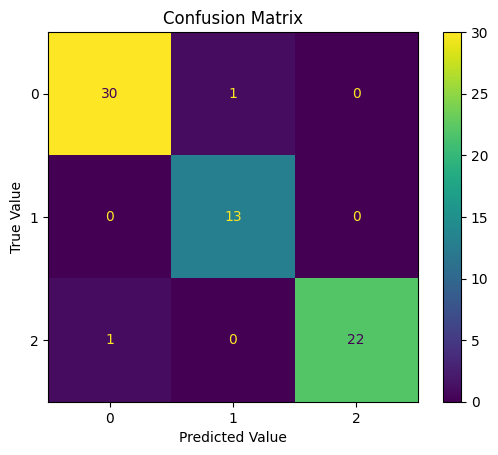

In [6]:
# Plotting the decision boundaries
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.xlabel("Predicted Value")
plt.ylabel("True Value")
plt.title("Confusion Matrix")
plt.show()

c:\Users\Administrator\Desktop\Berke\VSCode\Akariyer\sakademi\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_26584\1300639549.py:22: UserWarning: The following kwargs were not used by contour: 'c'
  plt.contourf(xx,yy,Z,c=y2,cmap='coolwarm',alpha=0.8)


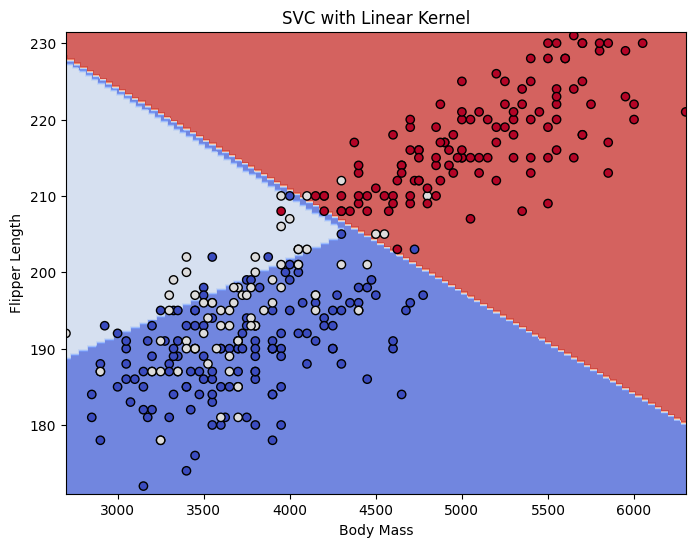

In [7]:
# Visualizing the decision boundaries for a reduced feature set
X2 = df[['body_mass_g','flipper_length_mm']]
y2 = df['species']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state=42)
model2 = SVC(kernel='linear',random_state=42)
model2.fit(X_train2,y_train2)

# Creating a meshgrid for decision boundary visualization
x_min,x_max = X2['body_mass_g'].min()-1,X2['body_mass_g'].max()+1
y_min,y_max = X2['flipper_length_mm'].min()-1,X2['flipper_length_mm'].max()+1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.5),np.arange(y_min,y_max,0.5))


# Predicting on the meshgrid and reshaping the results for plotting
Z = model2.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.figure(figsize=(8,6))
plt.contourf(xx,yy,Z,c=y2,cmap='coolwarm',alpha=0.8)
plt.scatter(X2['body_mass_g'],X2['flipper_length_mm'],c=y2,cmap='coolwarm',edgecolors='k')
plt.xlabel('Body Mass')
plt.ylabel('Flipper Length')
plt.title('SVC with Linear Kernel')
plt.show()

In [8]:
# Evaluating the reduced model
y2_pred = model2.predict(X_test2)
a_score2 = accuracy_score(y_test2,y2_pred)
print("Accuracy of Model 2: ", a_score2)
print("Classification Report of Model 2: ",classification_report(y_test2,y2_pred))

Accuracy of Model 2:  0.8208955223880597
Classification Report of Model 2:                precision    recall  f1-score   support

           0       0.75      0.97      0.85        31
           1       0.60      0.23      0.33        13
           2       1.00      0.96      0.98        23

    accuracy                           0.82        67
   macro avg       0.78      0.72      0.72        67
weighted avg       0.81      0.82      0.79        67



In [9]:
# Interactive function for user input predictions
def kullanici_verisi():
    print(f"SVM Model Accuracy Score :  {a_score}")
    while True:
        print("Enter the penguin's information to predict the species: ")
        Bodymass = float(input("BodyMass (g): "))
        culmendepthmm = float(input("Culmen Depth(mm): "))
        flipperlengthmm = float(input("Flipper Length (mm): "))

        prediction = model.predict([[Bodymass,culmendepthmm,flipperlengthmm]])
        prediction = {0 : 'Adelie', 1 : 'Chinstrap', 2 : 'Gentoo'}[prediction[0]]
        print("Model Prediction: ", prediction)

        continu = input("Do you want to continue (Y/N) ").upper()
        if continu == "N":
            break
    

In [10]:
# Calling the interactive prediction function
kullanici_verisi()

SVM Model Accuracy Score :  0.9701492537313433
Enter the penguin's information to predict the species: 


c:\Users\Administrator\Desktop\Berke\VSCode\Akariyer\sakademi\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Model Prediction:  Adelie
